In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import skimage
from skimage.io import imread , imshow
from skimage import color
from skimage import data
from skimage import measure
%matplotlib inline

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[0.99719451, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

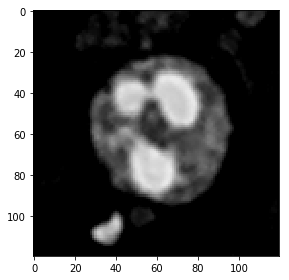

In [2]:
img = color.rgb2grey(imread('segmentation_WBC-master/Dataset 1/281.bmp'))
invert_img = 1-img
imshow(invert_img)
img

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


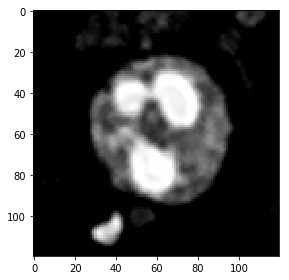

In [3]:
from skimage import exposure

# Contrast stretching
p2 = np.percentile(invert_img, 2)
p98 = np.percentile(invert_img, 98)
img_rescale = exposure.rescale_intensity(invert_img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(invert_img)
imshow(img_rescale)

In [4]:
contours = measure.find_contours(invert_img, 0.7)
contours

[array([[55.13634216, 76.        ],
        [55.60834809, 75.        ],
        [55.68832556, 74.        ],
        [55.47803022, 73.        ],
        [55.32393243, 72.        ],
        [55.41867184, 71.        ],
        [55.50111713, 70.        ],
        [55.33678627, 69.        ],
        [55.        , 68.49213854],
        [54.60356655, 68.        ],
        [54.        , 67.37816777],
        [53.6381419 , 67.        ],
        [53.        , 66.46682313],
        [52.46457523, 66.        ],
        [52.        , 65.63966076],
        [51.        , 65.05187277],
        [50.91920575, 65.        ],
        [50.        , 64.31391486],
        [49.67178804, 64.        ],
        [49.        , 63.46607092],
        [48.        , 63.10536841],
        [47.52207231, 63.        ],
        [47.        , 62.88285828],
        [46.        , 62.59159034],
        [45.        , 62.26240942],
        [44.43337608, 62.        ],
        [44.        , 61.82553922],
        [43.        , 61.147

(161, 2)
(91, 2)
(27, 2)
(17, 2)


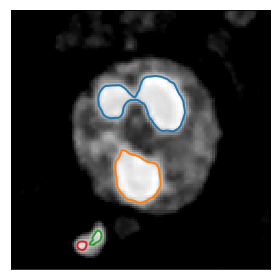

array([[0.00280549, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(invert_img, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    print(contour.shape)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('c_out.png',bbox_inches='tight',pad_inches=0)
plt.show()
invert_img


C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[0.00280549, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

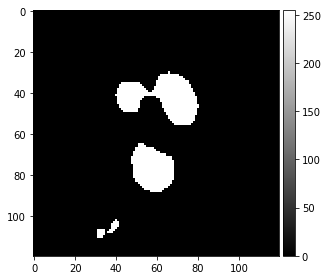

In [6]:
from skimage.draw import polygon
for n, contour in enumerate(contours):
    pr = np.array([p[0] for p in contour])
    pc = np.array([p[1] for p in contour])
    row = list(map(np.uint8,contour[:,0]))
    col = list(map(np.uint8,contour[:,1]))
    rr, cc = polygon(pr,pc)
    #print(pr,',',pc)
    invert_img[rr,cc] = 255
imshow(invert_img,cmap='gray')
invert_img

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


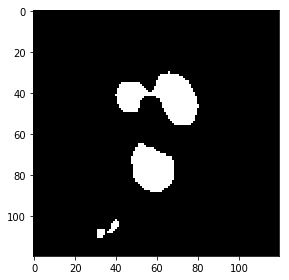

In [7]:
from skimage.filters import threshold_mean
thresh = threshold_mean(invert_img)
binary = invert_img > thresh
imshow(binary)

In [8]:
from skimage.measure import label, regionprops
label_img = label(binary)
props = regionprops(label_img)


C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


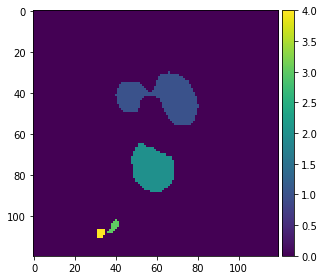

In [9]:
imshow(label_img)

In [12]:
for region in props:
    print(region.area)
    #print(region.convex_area)

573
375
21
15


In [14]:
len(props)

4